In [2]:
import matplotlib.pyplot as plt
import numpy as np

from shabanipy.resonators.billys_code.utils.jy_mpl_settings.settings import jy_mpl_rc
from shabanipy.resonators.billys_code.utils.jy_mpl_settings.colors import line_colors
plt.style.use(jy_mpl_rc)
import shabanipy.resonators.billys_code.utils.resonator_functions as rf

['004', '005', '007', '008', '009', '010', '011', '012']
[-0.0508 -1.6002  1.7018  1.1176  0.     -0.3556 -0.9652 -1.524 ]
-2.3402954991362437 8.677939699135981


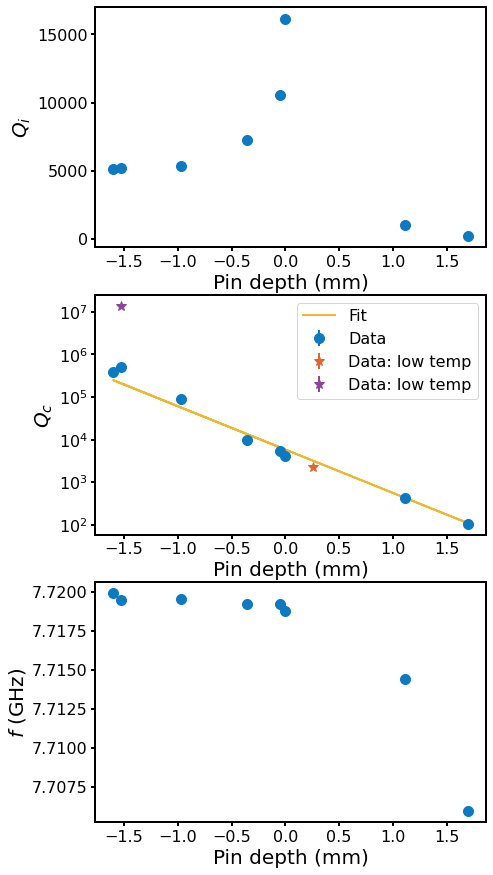

In [3]:
# Pin depths, adjusted and converted to mm (multiplied by 25.4 for inches to mm conversion)
pins = (np.array([.338, .277, .407, .384, .34, .326, .302, .28]) - .34) * 25.4

# Generate the sample IDs, skipping the number 6
ID = [f'{i:03}' for i in range(4, 13) if i != 6]
print(ID)  # Print the generated IDs
print(pins)  # Print the pin depths in mm

# File paths and sample name setup
sample = 'quwave_cav_nochip-WMS-001'
file = '/Users/billystrickland/Documents/code/resonators/data/'+sample+'/results/'
FILES = []  # Initialize list for file paths

# Define indices for data extraction
photon, power, qi_diacorr, qi_diacorr_err, qc, qc_err, ql, ql_err, freq, freq_err = range(10)

# Initialize an empty list to hold the data for each file
data = []

# Loop through the IDs to process each corresponding file
for i in range(len(ID)):
    # Append the file path for each sample data file
    FILES.append([file + ID[i] + '.csv'])
    
    # Process the CSV file and get the results
    results = rf.proc_csv(FILES[i])
    
    # Append the processed results to the data list
    data.append(rf.get_results(results, 100000))

# Remove unnecessary dimensions from the data (squeeze the data array)
data = np.squeeze(data)

# Labels for the subplots
labels = ['$Q_i$', '$Q_c$', '$f$ (GHz)']

# Create a figure with 3 subplots, vertically stacked
fig, ax = plt.subplots(3, 1, figsize=(7, 15))

# Plot Q_i data (absolute values with error bars) on the first subplot
ax[0].errorbar(pins, abs(np.array(data)[:, qi_diacorr]), yerr=data[:, qi_diacorr_err], marker='o', linestyle='None')

# Plot frequency data (converted to GHz) on the third subplot
ax[2].errorbar(pins, np.array(data)[:, freq] * 1e-9, yerr=data[:, freq_err] * 1e-9, marker='o', linestyle='None')

# Plot Q_c data (with error bars) on the second subplot
ax[1].errorbar(pins, np.array(data)[:, qc], yerr=data[:, qc_err], marker='o', linestyle='None', label='Data')

# Add low-temperature data points with star markers
ax[1].errorbar((.35 - .34) * 25.4, 2.3e3, yerr=1, marker='*', linestyle='None', label='Data: low temp')
ax[1].errorbar((.28 - .34) * 25.4, 1.39e7, yerr=1, marker='*', linestyle='None', label='Data: low temp')

# Set logarithmic scale for the y-axis on the second subplot (Q_c)
ax[1].set_yscale('log')

# Set axis labels
plt.xlabel('Pin depth (mm)')
plt.ylabel('$Q_c$')

# Fit a logarithmic curve to the Q_c data and plot the fitted curve
slope, intercept = np.polyfit(pins, np.log(np.array(data)[:, qc]), 1, w=1 / np.array(data[:, qc_err]))
ax[1].plot(pins, np.exp(slope * pins + intercept), label='Fit')

# Set labels for the other subplots
for i, label in enumerate(labels):
    ax[i].set_ylabel(label)
    ax[i].set_xlabel('Pin depth (mm)')

# Display legend on the second subplot
ax[1].legend()

# Print the fit parameters (slope and intercept)
print(slope, intercept)


In [4]:
import numpy as np

# Pin length in inches measured from the SMA connector
pin_length = .378  

# RT fits parameters: slope and intercept
slope, intercept = -2.3402954991362437, 8.677939699135981 

# Convert pin length to mm (from inches), with offset from the cavity wall
pin = (pin_length - .34) * 25.4 

# Calculate Qc based on the fit
qc = np.exp(slope * pin + intercept)

# Print the Qc value in thousands
print('Qc = ', qc * 1e-3, 'thousand')


Qc =  0.6134424681884125 thousand
